In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
from tqdm import tqdm
#from google.colab import files
nltk.download('stopwords')
from bs4 import BeautifulSoup
from textblob import TextBlob
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PREOATOR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PREOATOR\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\PREOATOR\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
file = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


###  reading train and test data

In [2]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [237]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [238]:
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [239]:
print(df_train.shape)
print(df_test.shape)

(7613, 5)
(3263, 4)


In [240]:
df_train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [ ]:
df_train.isnull().sum()

In [241]:
df_test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [242]:
x=df_train['target'].value_counts()

<AxesSubplot:ylabel='target'>

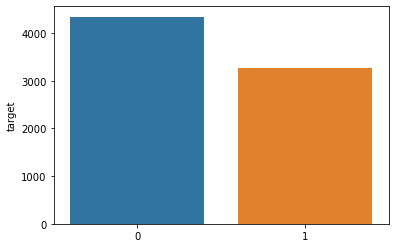

In [243]:
sns.barplot(x.index, x)

## No of Characters and words in the text

Text(0.5, 0.98, 'Characters in tweets')

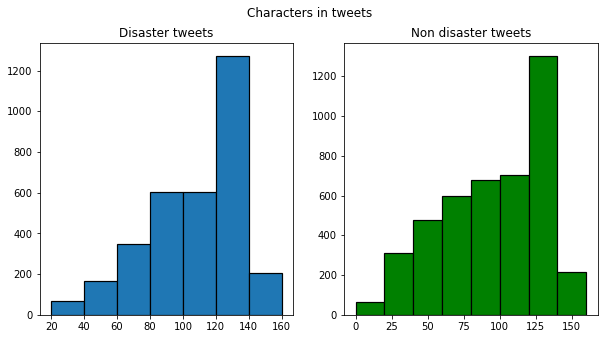

In [20]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
tweet_len = df_train[df_train['target']==1]['text'].str.len()
ax1.hist(tweet_len,bins=[20,40,60,80,100,120,140,160], edgecolor='black',linewidth=1.2)
ax1.set_title('Disaster tweets')
tweet_len = df_train[df_train['target']==0]['text'].str.len()
ax2.hist(tweet_len,bins=[0,20,40,60,80,100,120,140,160],color='green',edgecolor='black',linewidth=1.2)
ax2.set_title('Non disaster tweets')
fig.suptitle('Characters in tweets')

Text(0.5, 0.98, 'Words in a tweet')

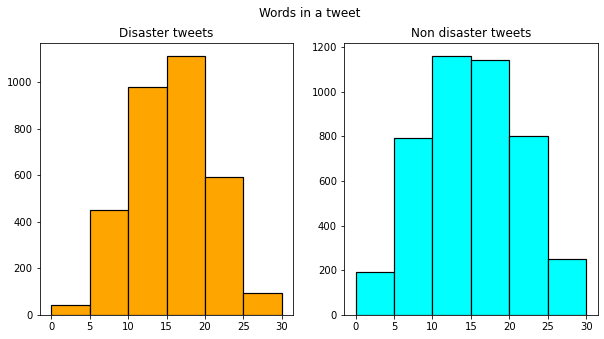

In [23]:
#Number of words in a tweet
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
tweet_len = df_train[df_train['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len, color='orange',bins=[0,5,10,15,20,25,30], edgecolor='black',linewidth=1.2)
ax1.set_title('Disaster tweets')
tweet_len = df_train[df_train['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='cyan',bins=[0,5,10,15,20,25,30], edgecolor='black',linewidth=1.2)
ax2.set_title('Non disaster tweets')
fig.suptitle('Words in a tweet')

In [244]:
def create_corpus(target):
    corpus=[]
    for x in df_train[df_train['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [245]:
def create_corpus_df(tweet, target):
    corpus=[]
    for x in df_train[df_train['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [246]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

### Punctuations in the Corpus

<BarContainer object of 20 artists>

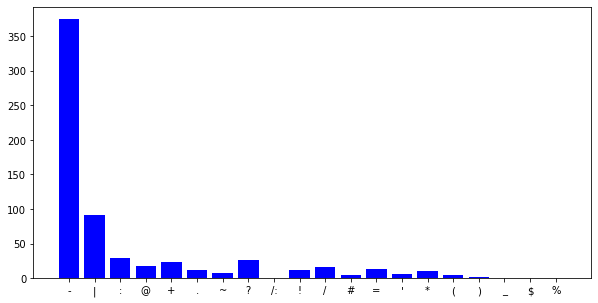

In [38]:
plt.figure(figsize=(10,5))
corpus = create_corpus(0)
dic = collections.defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
x,y=zip(*dic.items())
plt.bar(x, y,color='blue')

In [46]:
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=x, y=y)])
fig.show()

<BarContainer object of 18 artists>

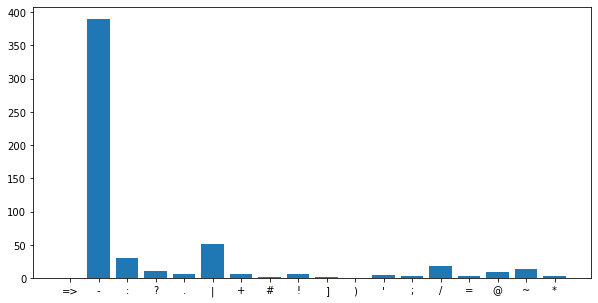

In [48]:
#Punctuations in disaster class
plt.figure(figsize=(10,5))
corpus = create_corpus(1)
dic = collections.defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
x,y = zip(*dic.items())
plt.bar(x, y)

In [247]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
### Word Cloud

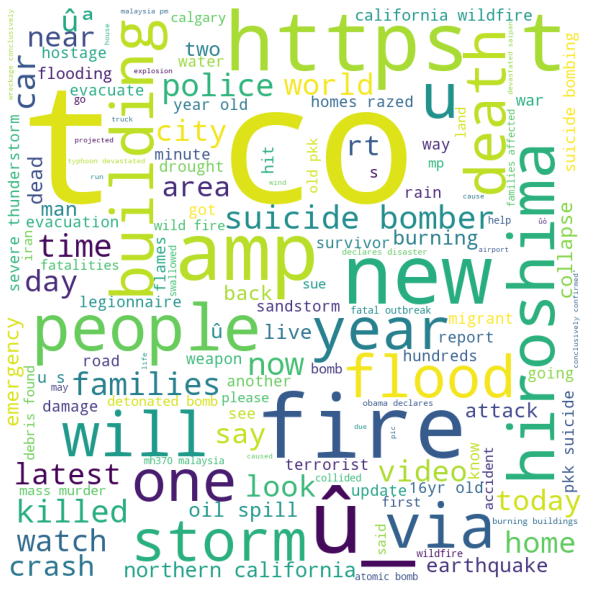

In [52]:
# https://www.geeksforgeeks.org/generating-word-cloud-python/
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in  df_train[df_train['target']==1]['text']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

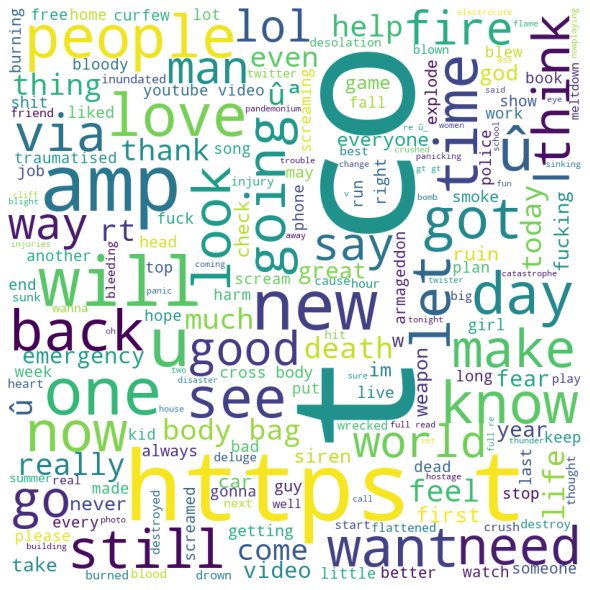

In [53]:
# https://www.geeksforgeeks.org/generating-word-cloud-python/
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in  df_train[df_train['target']==0]['text']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [5]:
# filling na values with ''
df_train['keyword_filled']=df_train['keyword']
df_train['keyword_filled'].fillna(value=' ', inplace=True)

In [6]:
df_train['keyword_filled'].isnull().sum()

0

In [7]:
#combine keyword and text features
df_train['key_text']=df_train['keyword_filled']+df_train['text']

In [8]:
df_train.head(5)

,id,keyword,location,text,target,keyword_filled,key_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,,Our Deeds are the Reason of this #earthquake ...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,,Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,,All residents asked to 'shelter in place' are...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,,"13,000 people receive #wildfires evacuation o..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,,Just got sent this photo from Ruby #Alaska as...


In [9]:
X_train_complete=df_train[['id','key_text','target']]

In [10]:
print(df_train.shape)
print(X_train_complete.shape)

(7613, 7)
(7613, 3)


In [11]:
X_train_complete.head(5)

,id,key_text,target
0,1,Our Deeds are the Reason of this #earthquake ...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are...,1
3,6,"13,000 people receive #wildfires evacuation o...",1
4,7,Just got sent this photo from Ruby #Alaska as...,1


In [12]:
df_test['keyword_filled']=df_test['keyword']
df_test['keyword_filled'].fillna(value=' ', inplace=True)
print(df_test['keyword_filled'].isnull().sum())
df_test['key_text']=df_test['keyword_filled']+df_test['text']

0


In [13]:
X_test_complete=df_test[['id','key_text']]

In [14]:
print(df_test.shape)
print(X_test_complete.shape)

(3263, 6)
(3263, 2)


In [15]:
X_test_complete.head(5)

,id,key_text
0,0,Just happened a terrible car crash
1,2,"Heard about #earthquake is different cities, ..."
2,3,"there is a forest fire at spot pond, geese ar..."
3,9,Apocalypse lighting. #Spokane #wildfires
4,11,Typhoon Soudelor kills 28 in China and Taiwan


In [16]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [17]:
 # https://stackoverflow.com/questions/34293875/how-to-remove-punctuation-marks-from-a-string-in-python-3-x-using-translate/34294022

def remove_URL(text):
  url = re.compile(r"https?://\S+|www\.\S+")
  return url.sub(r"", text)

def remove_punct(text):
  translator = str.maketrans("", "", string.punctuation)
  return text.translate(translator)

In [ ]:
## Remove URL snd punctution

In [18]:
X_train_complete["key_text"] = X_train_complete.key_text.map(remove_URL) 
X_train_complete["key_text"] = X_train_complete.key_text.map(remove_punct)

In [19]:
X_test_complete["key_text"] = X_test_complete.key_text.map(remove_URL) 
X_test_complete["key_text"] = X_test_complete.key_text.map(remove_punct)

In [ ]:
#Deduplication of entries

In [20]:
X_train_dd=X_train_complete.drop_duplicates(subset={"key_text"}, keep='first', inplace=False)
#X_test_dd =X_test_complete.drop_duplicates(subset={"key_text"}, keep='first', inplace=False)

In [21]:
X_test_dd=X_test_complete

In [22]:
X_test_dd.shape

(3263, 2)

In [23]:
X_train=X_train_dd.drop(columns='target')
X_test=X_test_dd
Y_train=X_train_dd['target']

In [24]:
X_train.head(5)

,id,key_text
0,1,Our Deeds are the Reason of this earthquake M...
1,4,Forest fire near La Ronge Sask Canada
2,5,All residents asked to shelter in place are b...
3,6,13000 people receive wildfires evacuation ord...
4,7,Just got sent this photo from Ruby Alaska as ...


In [25]:
X_test.head(5)

,id,key_text
0,0,Just happened a terrible car crash
1,2,Heard about earthquake is different cities st...
2,3,there is a forest fire at spot pond geese are...
3,9,Apocalypse lighting Spokane wildfires
4,11,Typhoon Soudelor kills 28 in China and Taiwan


In [26]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PREOATOR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [28]:
# https://stackoverflow.com/questions/16206380/python-beautifulsoup-how-to-remove-all-tags-from-an-element
# decontract phrases 
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase


from tqdm import tqdm
preprocessed_tweets = []
# tqdm is for printing the status bar
#remove tags remove numbers
for sentance in tqdm(X_train['key_text'].values):
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stop_words)
    preprocessed_tweets.append(sentance.strip())
    
j=0
for i in tqdm(preprocessed_tweets):
    j=j+1
print(j)


100%|██████████| 6999/6999 [00:00<00:00, 2339864.00it/s]

6999


In [29]:
X_train['preprocessed_tweets']=preprocessed_tweets

In [30]:
X_train_processed=X_train.drop(columns='key_text')

In [31]:
X_train_processed.shape

(6999, 2)

In [32]:
# https://stackoverflow.com/questions/16206380/python-beautifulsoup-how-to-remove-all-tags-from-an-element

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase


from tqdm import tqdm
preprocessed_tweets = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['key_text'].values):
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stop_words)
    preprocessed_tweets.append(sentance.strip())
    
j=0
for i in tqdm(preprocessed_tweets):
    j=j+1
print(j)


100%|██████████| 3263/3263 [00:00<00:00, 1638847.32it/s]

3263


In [33]:
X_test['preprocessed_tweets']=preprocessed_tweets

In [34]:
X_test_processed=X_test.drop(columns='key_text')

In [280]:
X_test_processed.shape

(3263, 2)

In [281]:
X_train_processed.columns

Index(['id', 'preprocessed_tweets'], dtype='object')

#### TF-IDF vectorization

In [282]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=1)
tf_idf_vect.fit(X_train_processed['preprocessed_tweets'])
print("some sample features(unique words in the corpus)",tf_idf_vect.get_feature_names()[0:10])
print('='*50)

final_tf_idf = tf_idf_vect.transform(X_train_processed['preprocessed_tweets'])
print("the type of count vectorizer ",type(final_tf_idf))
print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf.get_shape()[1])

some sample features(unique words in the corpus) ['aa', 'aa ayyo', 'aa batteries', 'aaaa', 'aaaa ok', 'aaaaaaallll', 'aaaaaaallll even', 'aaaaaand', 'aaaaaand theres', 'aaarrrgghhh']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (6999, 65807)
the number of unique words including both unigrams and bigrams  65807


In [283]:
print(final_tf_idf.shape)
print(Y_train.shape)

(6999, 65807)
(6999,)


In [284]:
final_test_tf_idf = tf_idf_vect.transform(X_test_processed['preprocessed_tweets'])
print("the type of count vectorizer ",type(final_test_tf_idf))
print("the shape of out text TFIDF vectorizer ",final_test_tf_idf.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_test_tf_idf.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (3263, 65807)
the number of unique words including both unigrams and bigrams  65807


In [285]:
Y_train.shape

(6999,)

In [ ]:
# feature engineering

In [286]:
X_train_processed.head()

,id,preprocessed_tweets
0,1,deeds reason earthquake may allah forgive us
1,4,forest fire near la ronge sask canada
2,5,residents asked shelter place notified officer...
3,6,people receive wildfires evacuation orders cal...
4,7,got sent photo ruby alaska smoke wildfires pou...


In [287]:
# https://towardsdatascience.com/text-analysis-feature-engineering-with-nlp-502d6ea9225d
# https://medium.com/analytics-vidhya/getting-started-with-textblob-156823634aab 

X_train_processed['sentiment']=X_train_processed['preprocessed_tweets'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [288]:
X_test_processed['sentiment']=X_test_processed['preprocessed_tweets'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [289]:
X_train_processed.head()

,id,preprocessed_tweets,sentiment
0,1,deeds reason earthquake may allah forgive us,0.0
1,4,forest fire near la ronge sask canada,0.1
2,5,residents asked shelter place notified officer...,-0.1
3,6,people receive wildfires evacuation orders cal...,0.0
4,7,got sent photo ruby alaska smoke wildfires pou...,0.0


In [290]:
X_train_processed['subjectivity']=X_train_processed['preprocessed_tweets'].apply(lambda x:TextBlob(x).sentiment.subjectivity)

In [291]:
X_test_processed['subjectivity']=X_test_processed['preprocessed_tweets'].apply(lambda x:TextBlob(x).sentiment.subjectivity)

In [292]:
print(X_train_processed['sentiment'].isnull().sum())
print(X_train_processed['subjectivity'].isnull().sum())

0
0


In [293]:
print(X_test_processed['sentiment'].isnull().sum())
print(X_test_processed['subjectivity'].isnull().sum())

0
0


In [294]:
pos_dic = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def pos_check(x, flag):
    cnt = 0
    try:
        wiki = TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_dic[flag]:
                cnt += 1
    except:
        pass
    return cnt

X_train_processed['noun_count'] = X_train_processed['preprocessed_tweets'].apply(lambda x: pos_check(x, 'noun'))
X_train_processed['verb_count'] = X_train_processed['preprocessed_tweets'].apply(lambda x: pos_check(x, 'verb'))
X_train_processed['adj_count'] = X_train_processed['preprocessed_tweets'].apply(lambda x: pos_check(x, 'adj'))
X_train_processed['adv_count'] = X_train_processed['preprocessed_tweets'].apply(lambda x: pos_check(x, 'adv'))
X_train_processed['pron_count'] = X_train_processed['preprocessed_tweets'].apply(lambda x: pos_check(x, 'pron'))

In [295]:
pos_dic = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def pos_check(x, flag):
    cnt = 0
    try:
        wiki = TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_dic[flag]:
                cnt += 1
    except:
        pass
    return cnt

X_test_processed['noun_count'] = X_test_processed['preprocessed_tweets'].apply(lambda x: pos_check(x, 'noun'))
X_test_processed['verb_count'] = X_test_processed['preprocessed_tweets'].apply(lambda x: pos_check(x, 'verb'))
X_test_processed['adj_count'] = X_test_processed['preprocessed_tweets'].apply(lambda x: pos_check(x, 'adj'))
X_test_processed['adv_count'] = X_test_processed['preprocessed_tweets'].apply(lambda x: pos_check(x, 'adv'))
X_test_processed['pron_count'] = X_test_processed['preprocessed_tweets'].apply(lambda x: pos_check(x, 'pron'))

In [296]:
X_train_processed.drop(columns=['adv_count','pron_count'],inplace=True)

In [297]:
X_test_processed.drop(columns=['adv_count','pron_count'],inplace=True)

In [298]:
X_train_processed.head()

,id,preprocessed_tweets,sentiment,subjectivity,noun_count,verb_count,adj_count
0,1,deeds reason earthquake may allah forgive us,0.0,0.0,3,1,1
1,4,forest fire near la ronge sask canada,0.1,0.4,4,0,2
2,5,residents asked shelter place notified officer...,-0.1,0.4,5,4,2
3,6,people receive wildfires evacuation orders cal...,0.0,0.0,3,2,1
4,7,got sent photo ruby alaska smoke wildfires pou...,0.0,0.0,5,3,1


In [299]:
X_test_processed.head()

,id,preprocessed_tweets,sentiment,subjectivity,noun_count,verb_count,adj_count
0,0,happened terrible car crash,-1.00,1.00,2,1,1
1,2,heard earthquake different cities stay safe ev...,0.25,0.55,3,1,2
2,3,forest fire spot pond geese fleeing across str...,0.00,0.00,4,2,2
3,9,apocalypse lighting spokane wildfires,0.00,0.00,3,1,0
4,11,typhoon soudelor kills china taiwan,0.00,0.00,3,1,1


In [300]:
X_train_processed['is_disaster']=Y_train

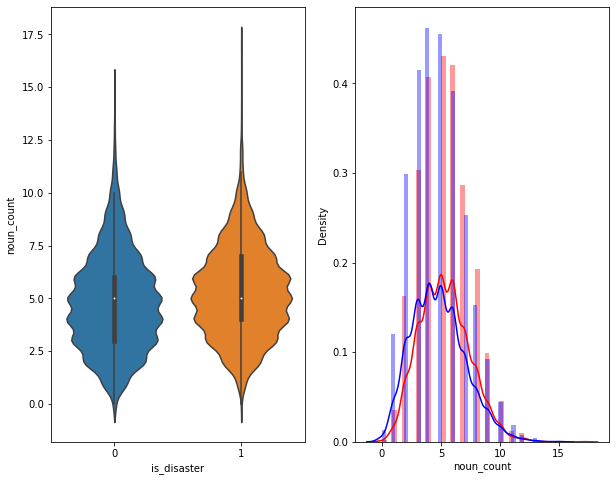

In [106]:
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_disaster', y = 'noun_count', data = X_train_processed[0:] , )

plt.subplot(1,2,2)
sns.distplot(X_train_processed[X_train_processed['is_disaster'] == 1]['noun_count'][0:] , label = "1", color = 'red')
sns.distplot(X_train_processed[X_train_processed['is_disaster'] == 0]['noun_count'][0:] , label = "0" , color = 'blue' )
plt.show()

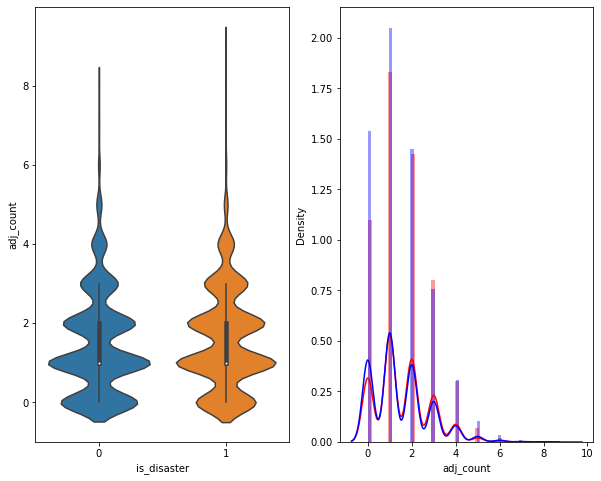

In [107]:
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_disaster', y = 'adj_count', data = X_train_processed[0:] , )

plt.subplot(1,2,2)
sns.distplot(X_train_processed[X_train_processed['is_disaster'] == 1]['adj_count'][0:] , label = "1", color = 'red')
sns.distplot(X_train_processed[X_train_processed['is_disaster'] == 0]['adj_count'][0:] , label = "0" , color = 'blue' )
plt.show()

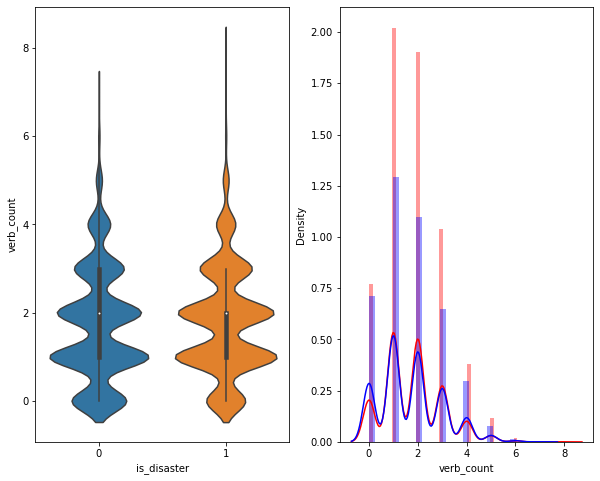

In [108]:
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_disaster', y = 'verb_count', data = X_train_processed[0:] , )

plt.subplot(1,2,2)
sns.distplot(X_train_processed[X_train_processed['is_disaster'] == 1]['verb_count'][0:] , label = "1", color = 'red')
sns.distplot(X_train_processed[X_train_processed['is_disaster'] == 0]['verb_count'][0:] , label = "0" , color = 'blue' )
plt.show()

In [301]:
X_train_processed.head()

,id,preprocessed_tweets,sentiment,subjectivity,noun_count,verb_count,adj_count,is_disaster
0,1,deeds reason earthquake may allah forgive us,0.0,0.0,3,1,1,1
1,4,forest fire near la ronge sask canada,0.1,0.4,4,0,2,1
2,5,residents asked shelter place notified officer...,-0.1,0.4,5,4,2,1
3,6,people receive wildfires evacuation orders cal...,0.0,0.0,3,2,1,1
4,7,got sent photo ruby alaska smoke wildfires pou...,0.0,0.0,5,3,1,1


### split the data for hyperparameter tunning

In [302]:
from sklearn.model_selection import train_test_split
X_train_split, X_test_split, y_train, y_test = train_test_split(X_train_processed, Y_train, test_size=0.33)

In [303]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=1)
tf_idf_vect.fit(X_train_split['preprocessed_tweets'])

TfidfVectorizer(ngram_range=(1, 2))

In [304]:
print(X_train_split.columns)
print(X_test_split.columns)

Index(['id', 'preprocessed_tweets', 'sentiment', 'subjectivity', 'noun_count',
       'verb_count', 'adj_count', 'is_disaster'],
      dtype='object')
Index(['id', 'preprocessed_tweets', 'sentiment', 'subjectivity', 'noun_count',
       'verb_count', 'adj_count', 'is_disaster'],
      dtype='object')


In [305]:
X_train_tfidf=tf_idf_vect.transform(X_train_split['preprocessed_tweets'])
X_test_tfidf=tf_idf_vect.transform(X_test_split['preprocessed_tweets'])

In [306]:
X_train_tfidf

<4689x46742 sparse matrix of type '<class 'numpy.float64'>'
	with 78410 stored elements in Compressed Sparse Row format>

In [307]:
X_train_processed['preprocessed_tweets']

0            deeds reason earthquake may allah forgive us
1                   forest fire near la ronge sask canada
2       residents asked shelter place notified officer...
3       people receive wildfires evacuation orders cal...
4       got sent photo ruby alaska smoke wildfires pou...
                              ...                        
7608    two giant cranes holding bridge collapse nearb...
7609    ariaahrary thetawniest control wild fires cali...
7610                                       volcano hawaii
7611    police investigating ebike collided car little...
7612    latest homes razed northern california wildfir...
Name: preprocessed_tweets, Length: 6999, dtype: object

In [308]:
### saving state

import dill
dill.dump_session('preprocess-1.db')

In [ ]:
#dill.load_session('preprocess-1.db')

### AVG W2V VECTORIZATION

In [153]:
#AVG-W2V
X_train, X_test, y_train, y_test = X_train_split['preprocessed_tweets'], X_test_split['preprocessed_tweets'], y_train, y_test
print(X_train.shape)
print(X_test.shape)

list_of_sentance_train=[]
for sentance in X_train:
    list_of_sentance_train.append(sentance.split())

w2v_model=Word2Vec(list_of_sentance_train,min_count=1,vector_size=100, workers=4)
w2v_words = list(w2v_model.wv.index_to_key)

sent_vectors_train = [];
for sent in tqdm(list_of_sentance_train): 
    sent_vec = np.zeros(100) 
    cnt_words =0; 
    for word in sent:
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_train.append(sent_vec)
sent_vectors_train = np.array(sent_vectors_train)
print(sent_vectors_train.shape)
print(sent_vectors_train[0])



list_of_sentance_test=[]
for sentance in X_test:
    list_of_sentance_test.append(sentance.split())
    
print(type(list_of_sentance_test[0]))
sent_vectors_test = [];
for sent in tqdm(list_of_sentance_test): 
    sent_vec = np.zeros(100) 
    cnt_words =0; 
    for word in sent:
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_test.append(sent_vec)
sent_vectors_test = np.array(sent_vectors_test)
print(sent_vectors_test.shape)
print(sent_vectors_test[0])

(4689,)
(2310,)


100%|██████████| 4689/4689 [00:02<00:00, 1899.40it/s]


(4689, 100)
[-9.95878265e-04  4.27308139e-04 -3.17292597e-04  8.45958712e-04
  1.08985302e-03 -2.58299295e-03  1.80235994e-03  3.53557993e-03
  1.29878644e-03 -5.76406562e-05 -1.24664750e-03 -8.87459319e-04
  3.78113992e-04 -8.16202237e-04 -2.59297951e-03 -2.39871226e-03
  7.51811593e-04 -1.39472172e-03  1.62907288e-03 -1.72319206e-03
  3.14728674e-03 -1.52977754e-03  4.52944167e-03 -1.10337198e-03
  2.67877776e-03  1.79970512e-04 -2.40997506e-03  1.97280251e-03
 -1.35409685e-03 -2.56098390e-04  4.94447214e-03  1.03710882e-03
  8.77806937e-04  5.14533924e-04  4.93001065e-04  3.87614143e-03
 -2.30898877e-03 -1.96513299e-04 -1.83051542e-05 -1.10268064e-03
  1.06313799e-03 -2.72491076e-03  1.26603454e-03 -1.67637592e-03
 -2.64448095e-04  1.60148867e-04  2.40362867e-03 -3.63552647e-04
  1.17956082e-03  2.60699764e-04  8.51350653e-04  6.48998888e-04
 -7.19503320e-04 -9.59361115e-05 -1.00510955e-03  2.23339525e-03
  2.09022050e-03  6.48362381e-04 -7.68695895e-04  5.30936182e-04
 -4.73233853e

100%|██████████| 2310/2310 [00:02<00:00, 1045.27it/s]

(2310, 100)
[-0.00034215 -0.00060087 -0.00237026  0.00266963  0.00164385  0.00144171
 -0.0017342   0.00399067 -0.0004987  -0.00149411  0.00061918 -0.00134101
 -0.00275705  0.00183262 -0.0020375   0.00207164  0.00343459  0.00070547
  0.00576195 -0.00058289  0.00165833  0.00312532  0.00075974 -0.00357082
 -0.00250077 -0.0070905   0.00222904 -0.00415493 -0.00364038 -0.00188066
  0.00340444  0.00065885  0.00012645 -0.00032671 -0.00246703  0.00384043
  0.00411999 -0.00126778 -0.00309896  0.00073031  0.00364776 -0.00087185
  0.002609   -0.00015398 -0.003972    0.00029001 -0.00017853 -0.0011041
  0.00066743  0.0001705   0.00218799  0.00061731 -0.00230286  0.00035502
 -0.00815991  0.00268153  0.00116924 -0.00401429 -0.00182244 -0.00067103
  0.00017677  0.00216469 -0.00074311 -0.00330424  0.00110205  0.00176747
  0.0040632  -0.00183966 -0.002441    0.00113784 -0.0008093   0.00072324
 -0.00038802  0.00370461 -0.00108565 -0.0014485  -0.0010399  -0.00406739
 -0.00224817  0.00083407 -0.00500331 -0.

In [155]:
print(sent_vectors_train.shape)
print(sent_vectors_test.shape)

(4689, 100)
(2310, 100)


### TF-IDF weighted W2V vectorization

In [159]:
#TFIDF-W2V

model = TfidfVectorizer()
tf_idf_matrix = model.fit_transform(X_train_split['preprocessed_tweets'])

dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

tfidf_feat = model.get_feature_names()
tfidf_sent_vectors = [];
row=0;
for sent in tqdm(list_of_sentance_train): 
    sent_vec = np.zeros(100) 
    weight_sum =0; 
    for word in sent: 
        if word in w2v_words and word in tfidf_feat:
            vec = w2v_model.wv[word]
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1


100%|██████████| 4689/4689 [00:08<00:00, 544.98it/s]


In [160]:
list_of_sentance_test=[]
for sentance in X_test_split['preprocessed_tweets']:
    list_of_sentance_test.append(sentance.split())

tfidf_sent_vectors_test = [];
row=0;
for sent in tqdm(list_of_sentance_test): 
    sent_vec = np.zeros(100) 
    weight_sum =0; 
    for word in sent: 
        if word in w2v_words and word in tfidf_feat:
            vec = w2v_model.wv[word]
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors_test.append(sent_vec)
    row += 1

100%|██████████| 2310/2310 [00:04<00:00, 504.38it/s]


### MNB

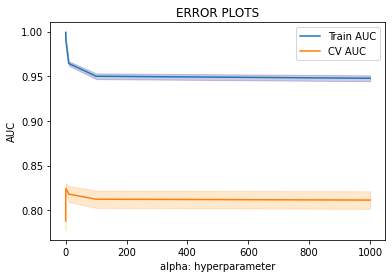

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score

mnb = MultinomialNB()
parameters = {'alpha':[0.001,0.01,0.1,1,10,100,1000]}
clf = GridSearchCV(mnb, parameters, cv=3, scoring='roc_auc',return_train_score=True)
clf.fit(X_train_tfidf, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

K = [0.001,0.01,0.1,1,10,100,1000]


plt.plot(K, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(K,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(K,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

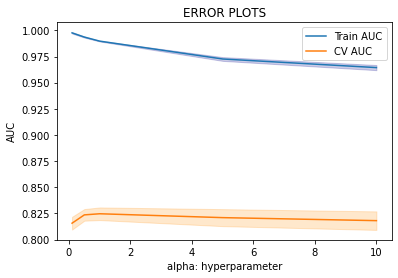

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score

mnb = MultinomialNB()
parameters = {'alpha':[0.1,0.5,1,5,10]}
clf = GridSearchCV(mnb, parameters, cv=3, scoring='roc_auc',return_train_score=True)
clf.fit(X_train_tfidf, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

K = [0.1,0.5,1,5,10]


plt.plot(K, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(K,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(K,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

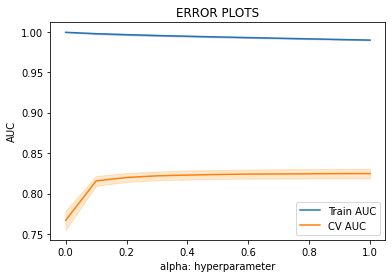

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score

mnb = MultinomialNB()
parameters = {'alpha':[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}
clf = GridSearchCV(mnb, parameters, cv=3, scoring='roc_auc',return_train_score=True)
clf.fit(X_train_tfidf, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

K = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]


plt.plot(K, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(K,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(K,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

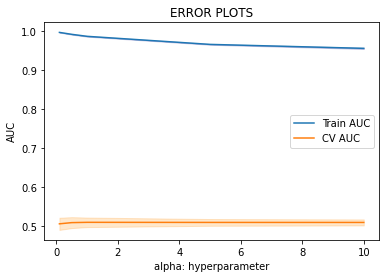

In [172]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score

mnb = MultinomialNB()
parameters = {'alpha':[0.1,0.5,1,5,10]}
clf = GridSearchCV(mnb, parameters, cv=3, scoring='roc_auc',return_train_score=True)
clf.fit(X_train_tfidf, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

K = [0.1,0.5,1,5,10]


plt.plot(K, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(K,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(K,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

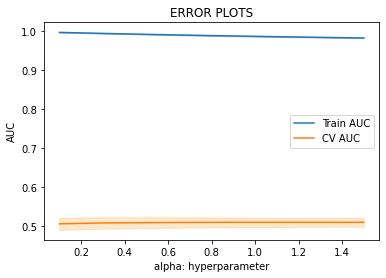

In [173]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score

mnb = MultinomialNB()
parameters = {'alpha':[0.1,0.3,0.5,0.7,0.9,1.1,1.3,1.5]}
clf = GridSearchCV(mnb, parameters, cv=3, scoring='roc_auc',return_train_score=True)
clf.fit(X_train_tfidf, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

K = [0.1,0.3,0.5,0.7,0.9,1.1,1.3,1.5]


plt.plot(K, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(K,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(K,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

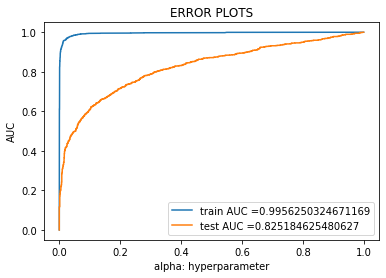

In [ ]:
from sklearn.metrics import roc_curve, auc


mnb = MultinomialNB(alpha=0.1)
mnb.fit(X_train_tfidf, y_train)


train_fpr, train_tpr, thresholds = roc_curve(y_train,mnb.predict_proba(X_train_tfidf)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test,mnb.predict_proba(X_test_tfidf)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB(alpha=0.1)
mnb.fit(final_tf_idf,Y_train)

MultinomialNB(alpha=0.1)

In [ ]:
X_test_processed.head()

,id,preprocessed_tweets
0,0,happened terrible car crash
1,2,heard earthquake different cities stay safe ev...
2,3,forest fire spot pond geese fleeing across str...
3,9,apocalypse lighting spokane wildfires
4,11,typhoon soudelor kills china taiwan


In [ ]:
pred=mnb.predict(final_test_tf_idf)


In [ ]:
prediction=X_test_processed

In [ ]:
prediction['target']=pred.astype(int)

In [ ]:
prediction.drop(columns='preprocessed_tweets',inplace=True)

In [ ]:
prediction.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [ ]:
prediction.to_csv('submission_tfidf_mnb.csv', index=False)

In [ ]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, mnb.predict(X_train_tfidf)))
print("Test confusion matrix")
print(confusion_matrix(y_test, mnb.predict(X_test_tfidf)))

Train confusion matrix
[[2739   34]
 [ 102 1814]]
Test confusion matrix
[[1090  254]
 [ 285  681]]


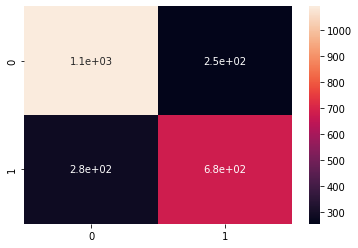

In [ ]:
import seaborn as sns
cf_matrix=confusion_matrix(y_test, mnb.predict(X_test_tfidf))
sns.heatmap(cf_matrix, annot=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, mnb.predict(X_test_tfidf)))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1344
           1       0.73      0.70      0.72       966

    accuracy                           0.77      2310
   macro avg       0.76      0.76      0.76      2310
weighted avg       0.77      0.77      0.77      2310



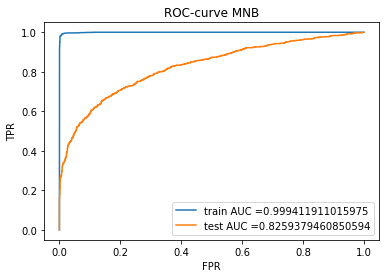

In [404]:
from sklearn.metrics import roc_curve, auc


mnb = MultinomialNB(alpha=0.1)
mnb.fit(X_train_tfidf, y_train)


train_fpr, train_tpr, thresholds = roc_curve(y_train,mnb.predict_proba(X_train_tfidf)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test,mnb.predict_proba(X_test_tfidf)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC-curve MNB")
plt.show()

In [405]:
from sklearn.metrics import classification_report
print(classification_report(y_test, mnb.predict(X_test_tfidf)))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81      1337
           1       0.76      0.66      0.71       973

    accuracy                           0.77      2310
   macro avg       0.77      0.76      0.76      2310
weighted avg       0.77      0.77      0.77      2310



### LINEAR SVM-TFIDF

In [ ]:
##NEW

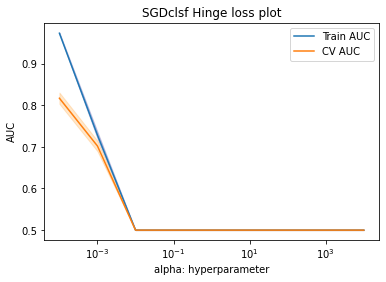

In [411]:
SGDclas = SGDClassifier(loss='hinge',penalty='l1',class_weight='balanced')
parameters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000,10000]}]
clf = GridSearchCV(SGDclas, parameters, cv=3, scoring='roc_auc',return_train_score=True)
clf.fit(X_train_tfidf, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

K = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000,10000]


plt.semilogx(K, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(K,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.semilogx(K, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(K,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("SGDclsf Hinge loss plot")
plt.show()

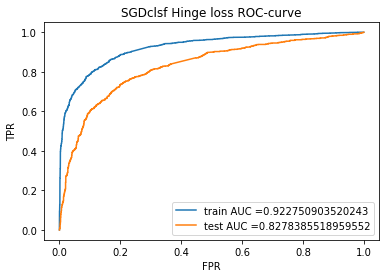

In [415]:
SGDclas = SGDClassifier(loss='hinge',penalty='l1')
SGDclas.fit(X_train_tfidf, y_train)
model = CalibratedClassifierCV(SGDclas,cv='prefit')
model.fit(X_train_tfidf, y_train)

train_fpr, train_tpr, thresholds = roc_curve(y_train,model.predict_proba(X_train_tfidf)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test,model.predict_proba(X_test_tfidf)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("SGDclsf Hinge loss ROC-curve")
plt.show()

In [416]:
print(classification_report(y_test, SGDclas.predict(X_test_tfidf)))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1337
           1       0.75      0.69      0.72       973

    accuracy                           0.77      2310
   macro avg       0.77      0.76      0.76      2310
weighted avg       0.77      0.77      0.77      2310



In [417]:
W1=SGDclas.coef_
l1=tf_idf_vect.get_feature_names()
cp5=np.argsort(W1[0])
topnve=cp5[:10]
toppve=cp5[-10:]
print("top 10 positive")

pve=[]
for i in toppve:
    pve.append(l1[i])
print(pve)

print("\n")

print("top 10 negative")
print("\n")
nve=[]
for i in topnve:
    nve.append(l1[i])
print(nve)

top 10 positive
['massacre', 'train', 'killed', 'earthquake', 'deaths', 'japan', 'storm', 'wildfire', 'fires', 'hiroshima']


top 10 negative


['ass', 'song', 'sure', 'cake', 'emotions', 'im', 'love', 'let', 'evacuateevacuate life', 'evacuateevacuate']


In [418]:
SGDclas = SGDClassifier(loss='hinge',penalty='l1')
SGDclas.fit(final_tf_idf,Y_train)
pred=SGDclas.predict(final_test_tf_idf)

sub=pd.read_csv('sample_submission.csv')
sub['id1']=sub['id']
sub['target1']=sub['target']
sub.drop(columns=['id','target'],inplace=True)
sub['id']=X_test_processed['id']
sub['target']=pred
sub.drop(columns=['id1','target1'],inplace=True)
sub.to_csv('submission_tfidf_SGDclasfHloss.csv', index=False)

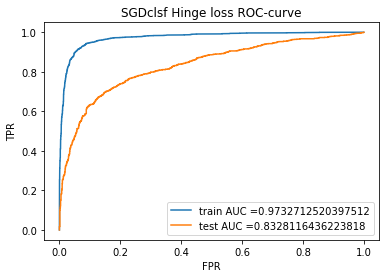

In [419]:
SGDclas = SGDClassifier(loss='hinge',alpha=0.001, class_weight='balanced')
SGDclas.fit(X_train_tfidf, y_train)
model = CalibratedClassifierCV(SGDclas,cv='prefit')
model.fit(X_train_tfidf, y_train)

train_fpr, train_tpr, thresholds = roc_curve(y_train,model.predict_proba(X_train_tfidf)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test,model.predict_proba(X_test_tfidf)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("SGDclsf Hinge loss ROC-curve")
plt.show()

In [420]:
print(classification_report(y_test, SGDclas.predict(X_test_tfidf)))

              precision    recall  f1-score   support

           0       0.75      0.91      0.83      1337
           1       0.83      0.59      0.69       973

    accuracy                           0.78      2310
   macro avg       0.79      0.75      0.76      2310
weighted avg       0.79      0.78      0.77      2310



In [421]:
W1=SGDclas.coef_
l1=tf_idf_vect.get_feature_names()
cp5=np.argsort(W1[0])
topnve=cp5[:10]
toppve=cp5[-10:]
print("top 10 positive")

pve=[]
for i in toppve:
    pve.append(l1[i])
print(pve)

print("\n")

print("top 10 negative")
print("\n")
nve=[]
for i in topnve:
    nve.append(l1[i])
print(nve)

top 10 positive
['news', 'buildings', 'killed', 'police', 'storm', 'california', 'train', 'hiroshima', 'fire', 'fires']


top 10 negative


['im', 'get', 'love', 'like', 'body', 'got', 'new', 'cant', 'time', 'want']


In [424]:
SGDclas = SGDClassifier(loss='hinge',alpha=0.001, class_weight='balanced')
SGDclas.fit(final_tf_idf,Y_train)
pred=SGDclas.predict(final_test_tf_idf)

sub=pd.read_csv('sample_submission.csv')
sub['id1']=sub['id']
sub['target1']=sub['target']
sub.drop(columns=['id','target'],inplace=True)
sub['id']=X_test_processed['id']
sub['target']=pred
sub.drop(columns=['id1','target1'],inplace=True)
sub.to_csv('submission_tfidf_SGDclasfHloss_l2r.csv', index=False)

In [ ]:
##SVC

In [425]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC

svc = SVC(kernel='rbf')
parameters ={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000,10000],  
             'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000,10000]}

clf = GridSearchCV(svc, parameters, cv=3, scoring='roc_auc',return_train_score=True)
clf.fit(X_train_tfidf, y_train)
print(clf.best_estimator_)

SVC(C=100, gamma=0.001)


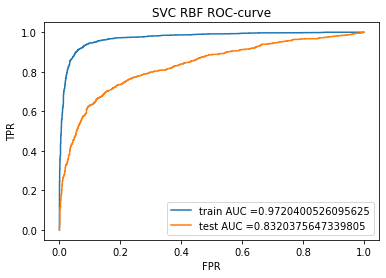

In [428]:
svc = SVC(C=100, gamma=0.001,kernel='rbf',probability=True,class_weight='balanced')

svc.fit(X_train_tfidf, y_train)


train_fpr, train_tpr, thresholds = roc_curve(y_train,svc.predict_proba(X_train_tfidf)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test,svc.predict_proba(X_test_tfidf)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("SVC RBF ROC-curve")
plt.show()

In [430]:
print(classification_report(y_test, svc.predict(X_test_tfidf)))

              precision    recall  f1-score   support

           0       0.75      0.92      0.83      1337
           1       0.84      0.58      0.69       973

    accuracy                           0.78      2310
   macro avg       0.79      0.75      0.76      2310
weighted avg       0.79      0.78      0.77      2310



In [431]:
svc = SVC(C=100, gamma=0.001,kernel='rbf',probability=True,class_weight='balanced')
svc.fit(final_tf_idf,Y_train)
pred=svc.predict(final_test_tf_idf)

In [432]:
sub=pd.read_csv('sample_submission.csv')
sub['id1']=sub['id']
sub['target1']=sub['target']
sub.drop(columns=['id','target'],inplace=True)
sub['id']=X_test_processed['id']
sub['target']=pred
sub.drop(columns=['id1','target1'],inplace=True)
sub.to_csv('submission_tfidf_SVC_RBF.csv', index=False)

### XGBOOST TF-IDF

In [372]:
from xgboost import XGBClassifier

In [373]:
x = [*range(1, 20, 1)] 

In [374]:
xgb = XGBClassifier(learning_rate=0.1)
parameters ={'n_estimators':[1, 2, 4, 8, 16, 32, 64, 100, 200],'max_depth':x}
clf6 = GridSearchCV(
    xgb, parameters, cv=3, scoring='roc_auc',return_train_score=True,verbose=5)
clf6.fit(X_train_tfidf, y_train)
print(clf6.best_estimator_)

Fitting 3 folds for each of 171 candidates, totalling 513 fits
[05:32:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END max_depth=1, n_estimators=1;, score=(train=0.513, test=0.509) total time=   0.0s
[05:32:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END max_depth=1, n_estimators=1;, score=(train=0.514, test=0.507) total time=   0.0s
[05:32:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, 

[05:32:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END max_depth=1, n_estimators=100;, score=(train=0.725, test=0.685) total time=   0.2s
[05:32:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END max_depth=1, n_estimators=100;, score=(train=0.720, test=0.700) total time=   0.1s
[05:32:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'bina

[05:32:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END max_depth=2, n_estimators=32;, score=(train=0.689, test=0.657) total time=   0.0s
[05:32:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END max_depth=2, n_estimators=32;, score=(train=0.691, test=0.671) total time=   0.1s
[05:32:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary

[CV 1/3] END max_depth=3, n_estimators=8;, score=(train=0.631, test=0.606) total time=   0.0s
[05:32:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END max_depth=3, n_estimators=8;, score=(train=0.592, test=0.587) total time=   0.0s
[05:32:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END max_depth=3, n_estimators=8;, score=(train=0.619, test=0.595) total time=   0.0s
[05:32:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:11

[05:33:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END max_depth=4, n_estimators=2;, score=(train=0.571, test=0.556) total time=   0.0s
[05:33:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END max_depth=4, n_estimators=4;, score=(train=0.597, test=0.584) total time=   0.0s
[05:33:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:l

[CV 2/3] END max_depth=4, n_estimators=200;, score=(train=0.896, test=0.797) total time=   1.0s
[05:33:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END max_depth=4, n_estimators=200;, score=(train=0.899, test=0.764) total time=   1.1s
[05:33:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END max_depth=5, n_estimators=1;, score=(train=0.561, test=0.553) total time=   0.0s
[05:33:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.c

[CV 2/3] END max_depth=5, n_estimators=64;, score=(train=0.832, test=0.769) total time=   0.4s
[05:33:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END max_depth=5, n_estimators=64;, score=(train=0.828, test=0.730) total time=   0.4s
[05:33:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END max_depth=5, n_estimators=100;, score=(train=0.873, test=0.759) total time=   0.7s
[05:33:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.c

[CV 2/3] END max_depth=6, n_estimators=16;, score=(train=0.717, test=0.696) total time=   0.1s
[05:33:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END max_depth=6, n_estimators=16;, score=(train=0.743, test=0.664) total time=   0.1s
[05:33:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END max_depth=6, n_estimators=32;, score=(train=0.790, test=0.716) total time=   0.2s
[05:33:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc

[CV 3/3] END max_depth=7, n_estimators=4;, score=(train=0.637, test=0.598) total time=   0.0s
[05:33:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END max_depth=7, n_estimators=8;, score=(train=0.695, test=0.642) total time=   0.0s
[05:33:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END max_depth=7, n_estimators=8;, score=(train=0.678, test=0.650) total time=   0.0s
[05:33:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:11

[05:33:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END max_depth=8, n_estimators=1;, score=(train=0.589, test=0.560) total time=   0.0s
[05:33:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END max_depth=8, n_estimators=2;, score=(train=0.631, test=0.604) total time=   0.0s
[05:33:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:l

[CV 2/3] END max_depth=8, n_estimators=100;, score=(train=0.907, test=0.797) total time=   1.1s
[05:33:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END max_depth=8, n_estimators=100;, score=(train=0.908, test=0.767) total time=   1.1s
[05:33:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END max_depth=8, n_estimators=200;, score=(train=0.948, test=0.786) total time=   2.2s
[05:34:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner

[CV 2/3] END max_depth=9, n_estimators=32;, score=(train=0.823, test=0.756) total time=   0.4s
[05:34:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END max_depth=9, n_estimators=32;, score=(train=0.831, test=0.720) total time=   0.4s
[05:34:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END max_depth=9, n_estimators=64;, score=(train=0.890, test=0.761) total time=   0.8s
[05:34:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc

[05:34:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END max_depth=10, n_estimators=8;, score=(train=0.720, test=0.643) total time=   0.1s
[05:34:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END max_depth=10, n_estimators=16;, score=(train=0.758, test=0.697) total time=   0.2s
[05:34:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binar

[05:34:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END max_depth=11, n_estimators=4;, score=(train=0.672, test=0.631) total time=   0.0s
[05:34:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END max_depth=11, n_estimators=4;, score=(train=0.676, test=0.657) total time=   0.0s
[05:34:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary

[CV 3/3] END max_depth=11, n_estimators=200;, score=(train=0.961, test=0.781) total time=   3.2s
[05:35:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END max_depth=12, n_estimators=1;, score=(train=0.637, test=0.599) total time=   0.0s
[05:35:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END max_depth=12, n_estimators=1;, score=(train=0.616, test=0.605) total time=   0.0s
[05:35:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.

[CV 3/3] END max_depth=12, n_estimators=64;, score=(train=0.911, test=0.761) total time=   1.1s
[05:35:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END max_depth=12, n_estimators=100;, score=(train=0.937, test=0.780) total time=   1.6s
[05:35:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END max_depth=12, n_estimators=100;, score=(train=0.931, test=0.801) total time=   1.6s
[05:35:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learn

[CV 3/3] END max_depth=13, n_estimators=16;, score=(train=0.813, test=0.708) total time=   0.2s
[05:35:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END max_depth=13, n_estimators=32;, score=(train=0.865, test=0.746) total time=   0.5s
[05:35:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END max_depth=13, n_estimators=32;, score=(train=0.862, test=0.779) total time=   0.5s
[05:35:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner

[CV 3/3] END max_depth=14, n_estimators=4;, score=(train=0.703, test=0.625) total time=   0.0s
[05:35:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END max_depth=14, n_estimators=8;, score=(train=0.739, test=0.682) total time=   0.1s
[05:35:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END max_depth=14, n_estimators=8;, score=(train=0.746, test=0.710) total time=   0.1s
[05:35:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc

[CV 1/3] END max_depth=15, n_estimators=2;, score=(train=0.672, test=0.630) total time=   0.0s
[05:36:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END max_depth=15, n_estimators=2;, score=(train=0.663, test=0.627) total time=   0.0s
[05:36:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END max_depth=15, n_estimators=2;, score=(train=0.662, test=0.616) total time=   0.0s
[05:36:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc

[CV 1/3] END max_depth=15, n_estimators=200;, score=(train=0.973, test=0.788) total time=   3.9s
[05:36:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END max_depth=15, n_estimators=200;, score=(train=0.970, test=0.804) total time=   3.9s
[05:36:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END max_depth=15, n_estimators=200;, score=(train=0.973, test=0.785) total time=   4.1s
[05:36:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/lear

[CV 1/3] END max_depth=16, n_estimators=64;, score=(train=0.928, test=0.775) total time=   1.3s
[05:36:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END max_depth=16, n_estimators=64;, score=(train=0.926, test=0.798) total time=   1.3s
[05:37:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END max_depth=16, n_estimators=64;, score=(train=0.931, test=0.768) total time=   1.3s
[05:37:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner

[CV 1/3] END max_depth=17, n_estimators=16;, score=(train=0.827, test=0.726) total time=   0.3s
[05:37:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END max_depth=17, n_estimators=16;, score=(train=0.821, test=0.754) total time=   0.3s
[05:37:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END max_depth=17, n_estimators=16;, score=(train=0.827, test=0.717) total time=   0.4s
[05:37:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner

[05:37:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END max_depth=18, n_estimators=4;, score=(train=0.720, test=0.686) total time=   0.1s
[05:37:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END max_depth=18, n_estimators=4;, score=(train=0.721, test=0.643) total time=   0.1s
[05:37:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary

[CV 2/3] END max_depth=19, n_estimators=1;, score=(train=0.659, test=0.617) total time=   0.0s
[05:38:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END max_depth=19, n_estimators=1;, score=(train=0.666, test=0.617) total time=   0.0s
[05:38:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END max_depth=19, n_estimators=2;, score=(train=0.681, test=0.633) total time=   0.0s
[05:38:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc

[CV 2/3] END max_depth=19, n_estimators=100;, score=(train=0.954, test=0.804) total time=   2.5s
[05:38:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END max_depth=19, n_estimators=100;, score=(train=0.961, test=0.780) total time=   2.5s
[05:38:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END max_depth=19, n_estimators=200;, score=(train=0.980, test=0.789) total time=   4.9s
[05:38:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/lear

[07:20:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


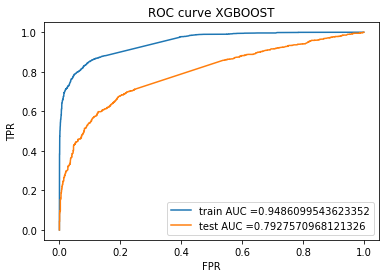

In [398]:
xgb1=XGBClassifier(max_depth=15,n_estimators=50)
xgb1.fit(X_train_tfidf, y_train)


train_fpr, train_tpr, thresholds = roc_curve(y_train,xgb1.predict_proba(X_train_tfidf)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test,xgb1.predict_proba(X_test_tfidf)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve XGBOOST")
plt.show()

Train confusion matrix
[[2719   61]
 [ 546 1363]]
Test confusion matrix
[[1212  125]
 [ 453  520]]


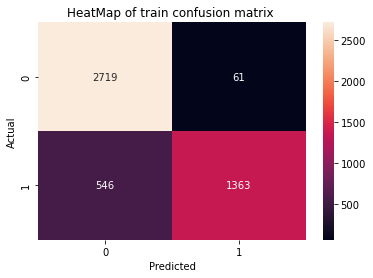

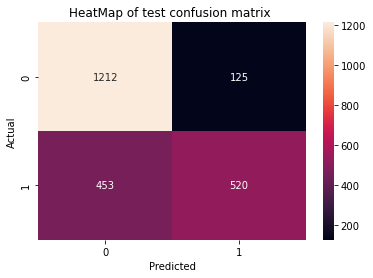

In [392]:
print("Train confusion matrix")
x=confusion_matrix(y_train, xgb1.predict(X_train_tfidf))
y=confusion_matrix(y_test, xgb1.predict(X_test_tfidf))
print(x)
print("Test confusion matrix")
print(y)


ax = plt.axes()
sns.heatmap(x, ax = ax,annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
ax.set_title("HeatMap of train confusion matrix ")
plt.show()

ax = plt.axes()
sns.heatmap(y, ax = ax,annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
ax.set_title("HeatMap of test confusion matrix ")
plt.show()

In [395]:
print(classification_report(y_test, xgb1.predict(X_test_tfidf)))

              precision    recall  f1-score   support

           0       0.73      0.91      0.81      1337
           1       0.81      0.53      0.64       973

    accuracy                           0.75      2310
   macro avg       0.77      0.72      0.73      2310
weighted avg       0.76      0.75      0.74      2310



In [407]:
xgb1=XGBClassifier(max_depth=15,n_estimators=50)
xgb1.fit(final_tf_idf, Y_train)

[07:40:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=15, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [408]:
pred=xgb1.predict(final_test_tf_idf)

In [409]:
sub=pd.read_csv('sample_submission.csv')
sub['id1']=sub['id']
sub['target1']=sub['target']
sub.drop(columns=['id','target'],inplace=True)
sub['id']=X_test_processed['id']
sub['target']=pred
sub.drop(columns=['id1','target1'],inplace=True)
sub.to_csv('submission_tfidf_XGBOOST.csv', index=False)

**AVG W2V vectors**

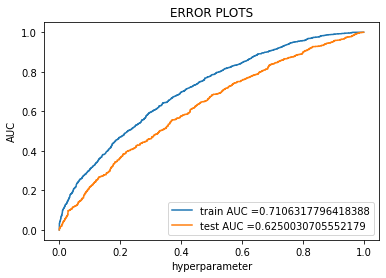

Train confusion matrix
[[2770   15]
 [1790  114]]
Test confusion matrix
[[1315   17]
 [ 940   38]]


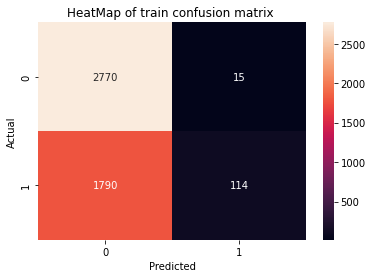

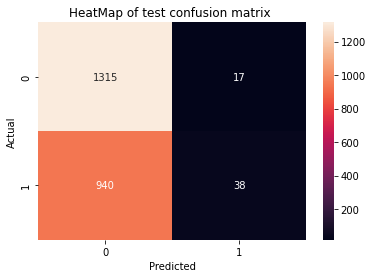

In [ ]:
xgb1=XGBClassifier(n_estimators=10,max_depth=5,learning_rate=0.001,colsample_bytree=0.6,subsample=0.6,gamma=10)
xgb1.fit(tfidf_sent_vectors, y_train)


train_fpr, train_tpr, thresholds = roc_curve(y_train,xgb1.predict_proba(sent_vectors_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test,xgb1.predict_proba(sent_vectors_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

print("Train confusion matrix")
x=confusion_matrix(y_train, xgb1.predict(sent_vectors_train))
y=confusion_matrix(y_test, xgb1.predict(sent_vectors_test))
print(x)
print("Test confusion matrix")
print(y)


ax = plt.axes()
sns.heatmap(x, ax = ax,annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
ax.set_title("HeatMap of train confusion matrix ")
plt.show()

ax = plt.axes()
sns.heatmap(y, ax = ax,annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
ax.set_title("HeatMap of test confusion matrix ")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, xgb1.predict(sent_vectors_test)))

              precision    recall  f1-score   support

           0       0.58      0.99      0.73      1332
           1       0.69      0.04      0.07       978

    accuracy                           0.59      2310
   macro avg       0.64      0.51      0.40      2310
weighted avg       0.63      0.59      0.45      2310



**TFIDF W2V,**

In [ ]:
tfidf_sent_vectors=np.array(tfidf_sent_vectors)
tfidf_sent_vectors_test=np.array(tfidf_sent_vectors_test)

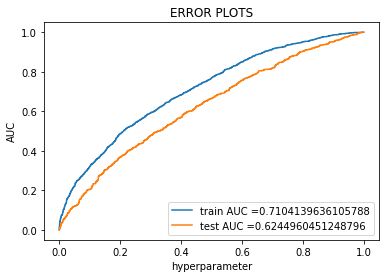

Train confusion matrix
[[2785    0]
 [1893   11]]
Test confusion matrix
[[1332    0]
 [ 978    0]]


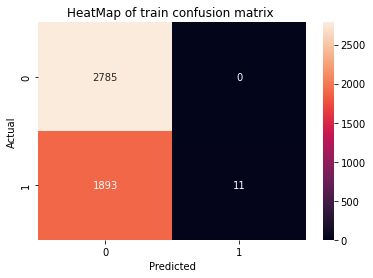

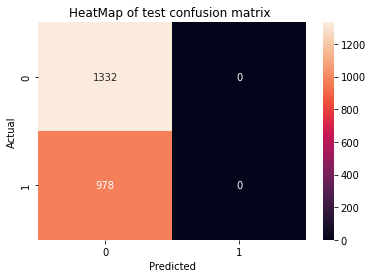

In [ ]:
xgb1=XGBClassifier(n_estimators=100,max_depth=4,learning_rate=0.001,colsample_bytree=0.6,subsample=0.6,gamma=10)
xgb1.fit(tfidf_sent_vectors, y_train)


train_fpr, train_tpr, thresholds = roc_curve(y_train,xgb1.predict_proba(tfidf_sent_vectors)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test,xgb1.predict_proba(tfidf_sent_vectors_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

print("Train confusion matrix")
x=confusion_matrix(y_train, xgb1.predict(tfidf_sent_vectors))
y=confusion_matrix(y_test, xgb1.predict(tfidf_sent_vectors_test))
print(x)
print("Test confusion matrix")
print(y)


ax = plt.axes()
sns.heatmap(x, ax = ax,annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
ax.set_title("HeatMap of train confusion matrix ")
plt.show()

ax = plt.axes()
sns.heatmap(y, ax = ax,annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
ax.set_title("HeatMap of test confusion matrix ")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, xgb1.predict(tfidf_sent_vectors_test)))

              precision    recall  f1-score   support

           0       0.58      1.00      0.73      1332
           1       0.00      0.00      0.00       978

    accuracy                           0.58      2310
   macro avg       0.29      0.50      0.37      2310
weighted avg       0.33      0.58      0.42      2310



**LogReg L1-TFIDF**

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3; 1/8] START C=0.0001....................................................
[CV 1/3; 1/8] END .C=0.0001;, score=(train=0.500, test=0.500) total time=   0.0s
[CV 2/3; 1/8] START C=0.0001....................................................
[CV 2/3; 1/8] END .C=0.0001;, score=(train=0.500, test=0.500) total time=   0.0s
[CV 3/3; 1/8] START C=0.0001....................................................
[CV 3/3; 1/8] END .C=0.0001;, score=(train=0.500, test=0.500) total time=   0.0s
[CV 1/3; 2/8] START C=0.001.....................................................
[CV 1/3; 2/8] END ..C=0.001;, score=(train=0.500, test=0.500) total time=   0.0s
[CV 2/3; 2/8] START C=0.001.....................................................
[CV 2/3; 2/8] END ..C=0.001;, score=(train=0.500, test=0.500) total time=   0.0s
[CV 3/3; 2/8] START C=0.001.....................................................
[CV 3/3; 2/8] END ..C=0.001;, score=(train=0.500,

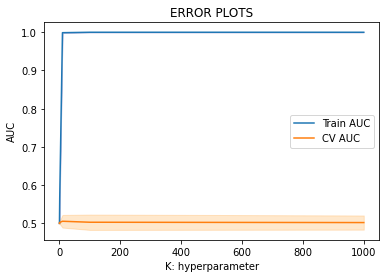

In [175]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1',solver='liblinear')
parameters = [{'C':[0.0001, 0.001, 0.01, 0.1,1,10,100,1000]}]
clf = GridSearchCV(lr, parameters, cv=3, scoring='roc_auc',return_train_score=True,verbose=10)
clf.fit(X_train_tfidf, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

K = [0.0001, 0.001, 0.01, 0.1,1,10,100,1000]


plt.plot(K, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(K,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(K,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

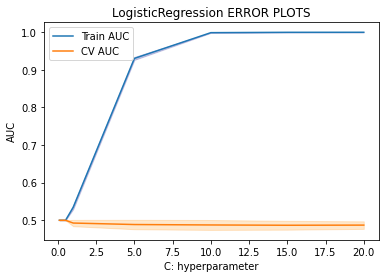

In [190]:
lr = LogisticRegression(penalty='l1',solver='liblinear')
parameters = [{'C':[0.1,0.5,1,5,10,15,20]}]
clf = GridSearchCV(lr, parameters, cv=3, scoring='roc_auc',return_train_score=True)
clf.fit(X_train_tfidf, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

K = [0.1,0.5,1,5,10,15,20]


plt.plot(K, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(K,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(K,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("LogisticRegression ERROR PLOTS")
plt.show()

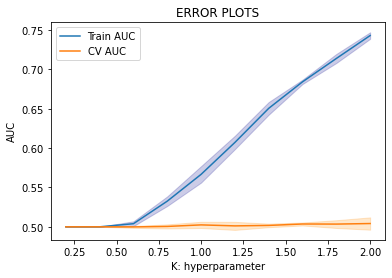

In [179]:
lr = LogisticRegression(penalty='l1',solver='liblinear')
parameters = [{'C':[0.0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0]}]
clf = GridSearchCV(lr, parameters, cv=3, scoring='roc_auc',return_train_score=True)
clf.fit(X_train_tfidf, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

K = [0.0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0]


plt.plot(K, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(K,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(K,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

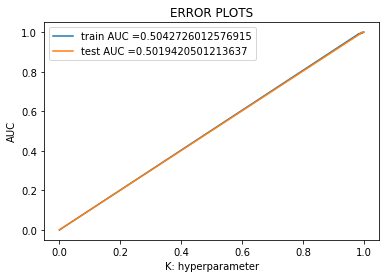

In [187]:
from sklearn.metrics import roc_curve, auc


lr = LogisticRegression(penalty='l1',C=0.6,solver='liblinear')
lr.fit(X_train_tfidf, y_train)


train_fpr, train_tpr, thresholds = roc_curve(y_train,lr.predict_proba(X_train_tfidf)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test,lr.predict_proba(X_test_tfidf)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

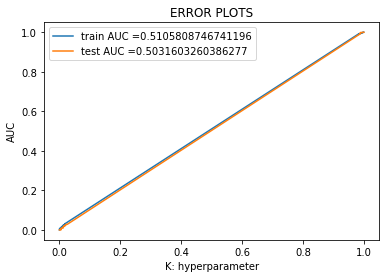

In [188]:
lr = LogisticRegression(penalty='l1',C=0.75,solver='liblinear')
lr.fit(X_train_tfidf, y_train)


train_fpr, train_tpr, thresholds = roc_curve(y_train,lr.predict_proba(X_train_tfidf)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test,lr.predict_proba(X_test_tfidf)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

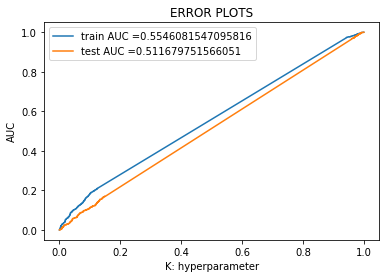

In [189]:
from sklearn.metrics import roc_curve, auc


lr = LogisticRegression(penalty='l1',C=1.0,solver='liblinear')
lr.fit(X_train_tfidf, y_train)


train_fpr, train_tpr, thresholds = roc_curve(y_train,lr.predict_proba(X_train_tfidf)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test,lr.predict_proba(X_test_tfidf)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [192]:
from sklearn.metrics import classification_report
print(classification_report(y_test, lr.predict(X_test_tfidf)))

              precision    recall  f1-score   support

           0       0.59      0.96      0.73      1357
           1       0.44      0.05      0.08       953

    accuracy                           0.58      2310
   macro avg       0.51      0.50      0.41      2310
weighted avg       0.53      0.58      0.46      2310



## TF-IDF L2 LOGREG

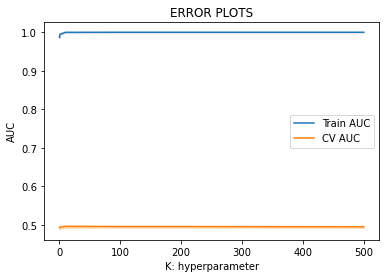

In [197]:
lr = LogisticRegression(penalty='l2')
parameters = [{'C':[ 0.1, 1, 10, 100,200,500]}]
clf = GridSearchCV(lr, parameters, cv=3, scoring='roc_auc',return_train_score=True)
clf.fit(X_train_tfidf, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

K = [0.1, 1, 10, 100,200,500]


plt.plot(K, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(K,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(K,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

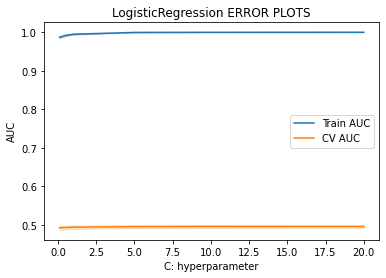

In [196]:
lr = LogisticRegression(penalty='l2')
parameters = [{'C':[0.1,0.5,1,5,10,15,20]}]
clf = GridSearchCV(lr, parameters, cv=3, scoring='roc_auc',return_train_score=True)
clf.fit(X_train_tfidf, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

K = [0.1,0.5,1,5,10,15,20]


plt.plot(K, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(K,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(K,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("LogisticRegression ERROR PLOTS")
plt.show()

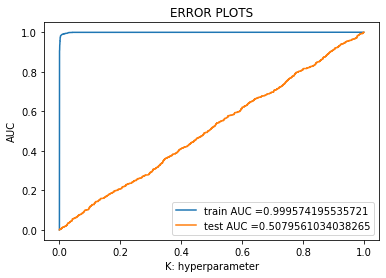

In [205]:
from sklearn.metrics import roc_curve, auc


lr = LogisticRegression(C=10)
lr.fit(X_train_tfidf, y_train)


train_fpr, train_tpr, thresholds = roc_curve(y_train,lr.predict_proba(X_train_tfidf)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test,lr.predict_proba(X_test_tfidf)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [206]:
print(classification_report(y_test, lr.predict(X_test_tfidf)))

              precision    recall  f1-score   support

           0       0.59      0.68      0.63      1357
           1       0.41      0.32      0.36       953

    accuracy                           0.53      2310
   macro avg       0.50      0.50      0.49      2310
weighted avg       0.51      0.53      0.52      2310



### Avg W2v

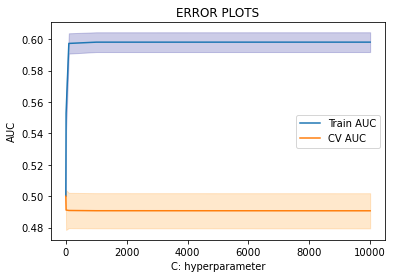

In [211]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression




lr = LogisticRegression(penalty='l1',solver='liblinear')
parameters = [{'C':[0.0001, 0.001, 0.01, 0.1,1,10,100,1000,10000]}]
clf = GridSearchCV(lr, parameters, cv=3, scoring='roc_auc',return_train_score=True)
clf.fit(sent_vectors_train, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

K = [0.0001, 0.001, 0.01, 0.1,1,10,100,1000,10000]


plt.plot(K, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(K,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(K,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

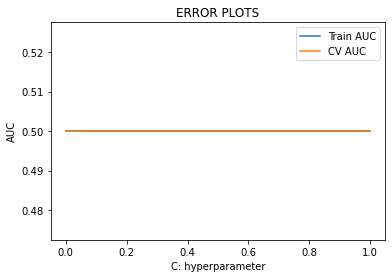

In [212]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression




lr = LogisticRegression(penalty='l1',solver='liblinear')
parameters = [{'C':[0.0001, 0.001, 0.01, 0.1,1]}]
clf = GridSearchCV(lr, parameters, cv=3, scoring='roc_auc',return_train_score=True)
clf.fit(sent_vectors_train, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

K = [0.0001, 0.001, 0.01, 0.1,1]


plt.plot(K, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(K,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(K,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [220]:
from sklearn.metrics import roc_curve, auc


lr = LogisticRegression(penalty='l1',C=1.0,solver='liblinear')
lr.fit(final_tf_idf,Y_train)


LogisticRegression(penalty='l1', solver='liblinear')

In [309]:
pred=lr.predict(final_test_tf_idf)

In [310]:
xx=X_test_processed['id']

In [316]:
sub=pd.read_csv('sample_submission.csv')

In [317]:
sub.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [319]:
sub['id1']=sub['id']
sub['target1']=sub['target']

In [321]:
sub.drop(columns=['id','target'],inplace=True)

In [323]:
sub['id']=X_test_processed['id']
sub['target']=pred

In [325]:
sub.drop(columns=['id1','target1'],inplace=True)

In [326]:
sub.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,0
4,11,1


In [327]:
sub.to_csv('submission_tfidf_logreg.csv', index=False)

In [ ]:
## score=0.75114

In [328]:
from sklearn.metrics import roc_curve, auc


lr = LogisticRegression(penalty='l1',C=1.0,solver='liblinear')
lr.fit(X_train_tfidf, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [329]:
print(classification_report(y_test, lr.predict(X_test_tfidf)))

              precision    recall  f1-score   support

           0       0.72      0.88      0.79      1337
           1       0.76      0.54      0.63       973

    accuracy                           0.73      2310
   macro avg       0.74      0.71      0.71      2310
weighted avg       0.74      0.73      0.72      2310



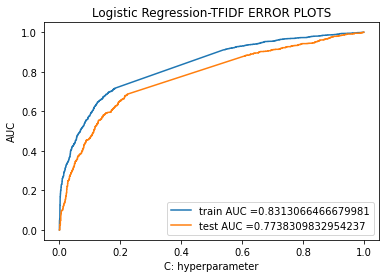

In [332]:
from sklearn.metrics import roc_curve, auc


lr = LogisticRegression(penalty='l1',C=1.0,solver='liblinear')
lr.fit(X_train_tfidf, y_train)


train_fpr, train_tpr, thresholds = roc_curve(y_train,lr.predict_proba(X_train_tfidf)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test,lr.predict_proba(X_test_tfidf)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("Logistic Regression-TFIDF ERROR PLOTS")
plt.show()

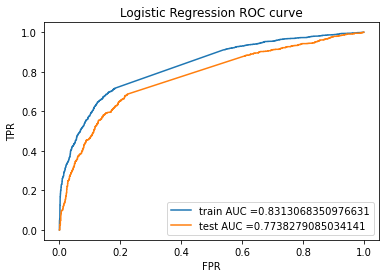

In [397]:
from sklearn.metrics import roc_curve, auc


lr = LogisticRegression(penalty='l1',C=1.0,solver='liblinear')
lr.fit(X_train_tfidf, y_train)


train_fpr, train_tpr, thresholds = roc_curve(y_train,lr.predict_proba(X_train_tfidf)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test,lr.predict_proba(X_test_tfidf)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Logistic Regression ROC curve")
plt.show()

In [ ]:
## Does Feng Help??

In [333]:
X_train_processed.head()

,id,preprocessed_tweets,sentiment,subjectivity,noun_count,verb_count,adj_count,is_disaster
0,1,deeds reason earthquake may allah forgive us,0.0,0.0,3,1,1,1
1,4,forest fire near la ronge sask canada,0.1,0.4,4,0,2,1
2,5,residents asked shelter place notified officer...,-0.1,0.4,5,4,2,1
3,6,people receive wildfires evacuation orders cal...,0.0,0.0,3,2,1,1
4,7,got sent photo ruby alaska smoke wildfires pou...,0.0,0.0,5,3,1,1


In [343]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X_train_split[['sentiment','subjectivity','noun_count','verb_count','adj_count']])

In [366]:
scaled_test = scaler.fit_transform(X_test_split[['sentiment','subjectivity','noun_count','verb_count','adj_count']])

In [357]:
X_train_tfidf.shape

(4689, 46742)

In [360]:
type(X_train_tfidf)

scipy.sparse.csr.csr_matrix

In [361]:
from scipy.sparse import csr_matrix
xsc=X_train_tfidf.todense()

In [367]:
xtst=X_test_tfidf.todense()

In [355]:
scaled=np.array(scaled)

In [362]:
xsc.shape

(4689, 46742)

In [363]:
scaled.shape

(4689, 5)

In [364]:
X_train_tfidf_fe=np.hstack((xsc,scaled))

In [368]:
X_test_tfidf_fe=np.hstack((xtst,scaled_test))

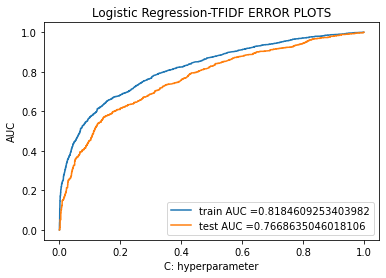

In [369]:
from sklearn.metrics import roc_curve, auc


lr = LogisticRegression(penalty='l1',C=1.0,solver='liblinear')
lr.fit(X_train_tfidf_fe, y_train)


train_fpr, train_tpr, thresholds = roc_curve(y_train,lr.predict_proba(X_train_tfidf_fe)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test,lr.predict_proba(X_test_tfidf_fe)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("Logistic Regression-TFIDF ERROR PLOTS")
plt.show()

L1-reg , TF-IDF 

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3; 1/8] START C=0.0001....................................................
[CV 1/3; 1/8] END .C=0.0001;, score=(train=0.500, test=0.500) total time=   0.0s
[CV 2/3; 1/8] START C=0.0001....................................................
[CV 2/3; 1/8] END .C=0.0001;, score=(train=0.500, test=0.500) total time=   0.0s
[CV 3/3; 1/8] START C=0.0001....................................................
[CV 3/3; 1/8] END .C=0.0001;, score=(train=0.500, test=0.500) total time=   0.0s
[CV 1/3; 2/8] START C=0.001.....................................................
[CV 1/3; 2/8] END ..C=0.001;, score=(train=0.500, test=0.500) total time=   0.0s
[CV 2/3; 2/8] START C=0.001.....................................................
[CV 2/3; 2/8] END ..C=0.001;, score=(train=0.500, test=0.500) total time=   0.0s
[CV 3/3; 2/8] START C=0.001.....................................................
[CV 3/3; 2/8] END ..C=0.001;, score=(train=0.500,

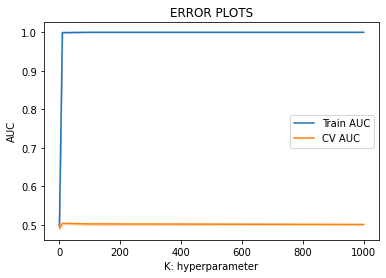

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1',solver='liblinear')
parameters = [{'C':[0.0001, 0.001, 0.01, 0.1,1,10,100,1000]}]
clf = GridSearchCV(lr, parameters, cv=3, scoring='roc_auc',return_train_score=True,verbose=10)
clf.fit(X_train_tfidf, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

K = [0.0001, 0.001, 0.01, 0.1,1,10,100,1000]


plt.plot(K, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(K,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(K,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [ ]:
clf.best_estimator_

LogisticRegression(C=10, penalty='l1', solver='liblinear')

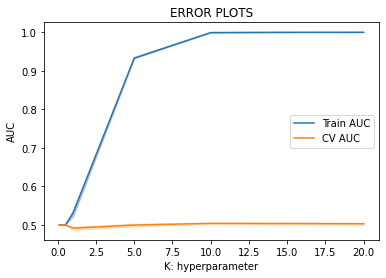

In [ ]:
lr = LogisticRegression(penalty='l1',solver='liblinear')
parameters = [{'C':[0.1,0.5,1,5,10,15,20]}]
clf = GridSearchCV(lr, parameters, cv=3, scoring='roc_auc',return_train_score=True,verbose=1)
clf.fit(X_train_tfidf, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

K = [0.1,0.5,1,5,10,15,20]


plt.plot(K, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(K,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(K,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

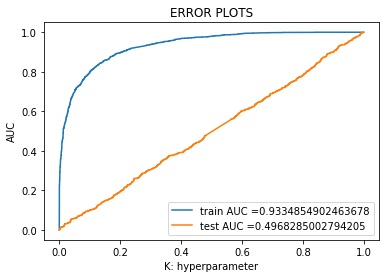

In [ ]:
from sklearn.metrics import roc_curve, auc


lr = LogisticRegression(penalty='l1',C=5,solver='liblinear')
lr.fit(X_train_tfidf, y_train)


train_fpr, train_tpr, thresholds = roc_curve(y_train,lr.predict_proba(X_train_tfidf)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test,lr.predict_proba(X_test_tfidf)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END ......C=0.0001;, score=(train=0.983, test=0.495) total time=   0.1s
[CV 2/3] END ......C=0.0001;, score=(train=0.985, test=0.499) total time=   0.1s
[CV 3/3] END ......C=0.0001;, score=(train=0.989, test=0.504) total time=   0.1s
[CV 1/3] END .......C=0.001;, score=(train=0.983, test=0.495) total time=   0.1s
[CV 2/3] END .......C=0.001;, score=(train=0.985, test=0.499) total time=   0.1s
[CV 3/3] END .......C=0.001;, score=(train=0.989, test=0.504) total time=   0.1s
[CV 1/3] END ........C=0.01;, score=(train=0.983, test=0.495) total time=   0.1s
[CV 2/3] END ........C=0.01;, score=(train=0.986, test=0.499) total time=   0.1s
[CV 3/3] END ........C=0.01;, score=(train=0.989, test=0.504) total time=   0.1s
[CV 1/3] END .........C=0.1;, score=(train=0.985, test=0.495) total time=   0.2s
[CV 2/3] END .........C=0.1;, score=(train=0.987, test=0.499) total time=   0.2s
[CV 3/3] END .........C=0.1;, score=(train=0.990,

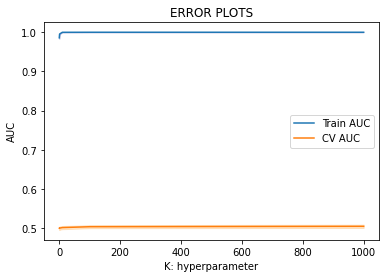

In [ ]:
lr = LogisticRegression(penalty='l2')
parameters = [{'C':[0.0001, 0.001, 0.01, 0.1,1,10,100,1000]}]
clf = GridSearchCV(lr, parameters, cv=3, scoring='roc_auc',return_train_score=True,verbose=5)
clf.fit(X_train_tfidf, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

K = [0.0001, 0.001, 0.01, 0.1,1,10,100,1000]


plt.plot(K, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(K,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(K,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [ ]:
clf.best_estimator_

LogisticRegression(C=1000)

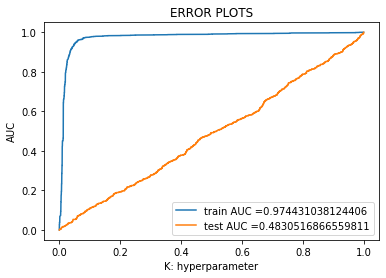

In [ ]:
from sklearn.metrics import roc_curve, auc


lr = LogisticRegression(C=0.001)
lr.fit(X_train_tfidf, y_train)


train_fpr, train_tpr, thresholds = roc_curve(y_train,lr.predict_proba(X_train_tfidf)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test,lr.predict_proba(X_test_tfidf)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

### DL-2

In [42]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from tensorflow.keras import Sequential
from keras.layers import Dense,Embedding
from keras.layers import LSTM
from keras.preprocessing import sequence
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [44]:
from keras.layers import LSTM

In [45]:
X_train_processed.head()

,id,preprocessed_tweets
0,1,deeds reason earthquake may allah forgive us
1,4,forest fire near la ronge sask canada
2,5,residents asked shelter place notified officer...
3,6,people receive wildfires evacuation orders cal...
4,7,got sent photo ruby alaska smoke wildfires pou...


In [46]:
proc_tweet=X_train_processed['preprocessed_tweets']

In [ ]:
X_train_processed['preprocessed_tweets'][0]

'deeds reason earthquake may allah forgive us'

In [47]:
X_train_processed.shape

(6999, 2)

In [48]:
Ytr=Y_train.values.reshape(-1,1)

In [49]:
max_words = 100000
max_len = 100

tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train_processed['preprocessed_tweets'])
sequences = tok.texts_to_sequences(X_train_processed['preprocessed_tweets'])
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [50]:
sequences_matrix[1729]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
       9192,    1,   40, 9193,   78, 3391,  102,   34,   34,  278, 9194,
         77])

In [51]:
model=tf.keras.Sequential()

model.add(tf.keras.layers.Input(shape=[max_len]))
model.add(tf.keras.layers.Embedding(max_words,128,input_length=max_len))    

model.add(tf.keras.layers.LSTM(200, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.LSTM(200,return_sequences=True))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.LSTM(200))
model.add(tf.keras.layers.Dropout(0.5))
          
model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          12800000  
                                                                 
 lstm (LSTM)                 (None, 100, 200)          263200    
                                                                 
 dropout (Dropout)           (None, 100, 200)          0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 200)          320800    
                                                                 
 dropout_1 (Dropout)         (None, 100, 200)          0         
                                                                 
 lstm_2 (LSTM)               (None, 200)               320800    
                                                                 
 dropout_2 (Dropout)         (None, 200)               0

In [53]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

In [54]:
hist=model.fit(sequences_matrix,Ytr,batch_size=64,epochs=5)

Epoch 1/5
110/110 [==============================] - 75s 644ms/step - loss: 0.5789 - acc: 0.6832
Epoch 2/5
110/110 [==============================] - 73s 665ms/step - loss: 0.2963 - acc: 0.8804
Epoch 3/5
110/110 [==============================] - 72s 658ms/step - loss: 0.1218 - acc: 0.9576
Epoch 4/5
110/110 [==============================] - 74s 673ms/step - loss: 0.0668 - acc: 0.9810
Epoch 5/5
110/110 [==============================] - 75s 686ms/step - loss: 0.0476 - acc: 0.9870


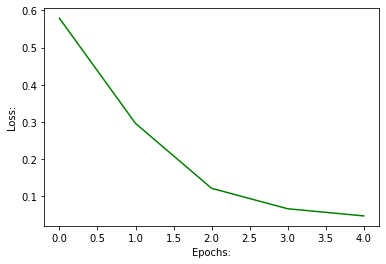

In [55]:
plt.plot(hist.history['loss'],'g')
plt.xlabel('Epochs:')
plt.ylabel('Loss:')
plt.show()

In [ ]:
X_test_processed.head()

,id,preprocessed_tweets
0,0,happened terrible car crash
1,2,heard earthquake different cities stay safe ev...
2,3,forest fire spot pond geese fleeing across str...
3,9,apocalypse lighting spokane wildfires
4,11,typhoon soudelor kills china taiwan


In [ ]:
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_test_processed['preprocessed_tweets'])
sequences_test = tok.texts_to_sequences(X_test_processed['preprocessed_tweets'])
sequences_matrix_test = sequence.pad_sequences(sequences_test,maxlen=max_len)

In [ ]:
pred=model.predict(sequences_matrix_test)

In [ ]:
pred=(pred>0.5)*1

In [ ]:
p=pd.DataFrame()
p['id']=X_test_processed['id']
p['target']=pred
p.to_csv('sub_lstm.csv',index=False)

In [ ]:
max_words = 20000
max_len = 100

tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train_processed['preprocessed_tweets'])
sequences1 = tok.texts_to_sequences(X_train_processed['preprocessed_tweets'])
sequences_matrix1 = sequence.pad_sequences(sequences1,maxlen=max_len)

In [ ]:
ewl=32
model=Sequential()
model.add(Embedding(max_words,128))
model.add(LSTM(128,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 128)         2560000   
                                                                 
 lstm_5 (LSTM)               (None, 128)               131584    
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.fit(sequences_matrix1,Ytr, epochs=3)

Epoch 1/3
219/219 [==============================] - 38s 162ms/step - loss: 0.5430 - accuracy: 0.7247
Epoch 2/3
219/219 [==============================] - 36s 163ms/step - loss: 0.3388 - accuracy: 0.8707
Epoch 3/3
219/219 [==============================] - 35s 161ms/step - loss: 0.1380 - accuracy: 0.9529


In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

In [ ]:
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_test_processed['preprocessed_tweets'])
sequences_test = tok.texts_to_sequences(X_test_processed['preprocessed_tweets'])
sequences_matrix_test = sequence.pad_sequences(sequences_test,maxlen=max_len)

In [ ]:
pred=model.predict(sequences_matrix_test)

In [ ]:
pred=(pred>0.5)*1

In [ ]:
X_test_processed.shape

(3263, 2)

In [ ]:
p=pd.DataFrame()
p['id']=X_test_processed['id']
p['target']=pred
p.to_csv('sub_lstm_2.csv',index=False)

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
plt.style.use('ggplot')

In [3]:
from nltk.util import ngrams
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from collections import defaultdict
from collections import  Counter
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.initializers import Constant
from keras.layers import (LSTM, 
                          Embedding, 
                          BatchNormalization,
                          Dense, 
                          TimeDistributed, 
                          Dropout, 
                          Bidirectional,
                          Flatten, 
                          GlobalMaxPool1D)
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers.embeddings import Embedding
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report,
    accuracy_score
)

In [35]:
X_test_processed['preprocessed_tweets']

0                             happened terrible car crash
1       heard earthquake different cities stay safe ev...
2       forest fire spot pond geese fleeing across str...
3                   apocalypse lighting spokane wildfires
4                     typhoon soudelor kills china taiwan
                              ...                        
3258    earthquake safety los angeles safety fasteners...
3259    storm ri worse last hurricane hardest hit yard...
3260                        green line derailment chicago
3261             meg issues hazardous weather outlook hwo
3262    cityofcalgary activated municipal emergency pl...
Name: preprocessed_tweets, Length: 3263, dtype: object

In [36]:
#get length of tweet
tweetLen= X_test_processed['preprocessed_tweets'].str.split().map(lambda x: len(x))

In [37]:
train = X_train_processed['preprocessed_tweets'].values
test = X_test_processed['preprocessed_tweets'].values
ytrain = Y_train.values

In [ ]:
# https://blog.paperspace.com/pre-trained-word-embeddings-natural-language-processing/

In [39]:
wordTokenizer = Tokenizer()
wordTokenizer.fit_on_texts(train)
vocabLength = len(wordTokenizer.word_index) + 1

In [40]:
def metrics(pred_tag, y_test):
    print("F1-score: ", f1_score(pred_tag, y_test))
    print("Precision: ", precision_score(pred_tag, y_test))
    print("Recall: ", recall_score(pred_tag, y_test))
    print("Acuracy: ", accuracy_score(pred_tag, y_test))
    print("-"*50)
    print(classification_report(pred_tag, y_test))
def embed(corpus): 
    return wordTokenizer.texts_to_sequences(corpus)

In [41]:
def plot(history, arr):
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    for idx in range(2):
        ax[idx].plot(history.history[arr[idx][0]])
        ax[idx].plot(history.history[arr[idx][1]])
        ax[idx].legend([arr[idx][0], arr[idx][1]],fontsize=18)
        ax[idx].set_xlabel('A ',fontsize=16)
        ax[idx].set_ylabel('B',fontsize=16)
        ax[idx].set_title(arr[idx][0] + ' X ' + arr[idx][1],fontsize=16)

In [43]:
longest_train = max(train, key=lambda sentence: len(word_tokenize(sentence)))
print("longest train={}".format(longest_train))
length_long_sentence = len(word_tokenize(longest_train))
print(length_long_sentence)
padded_sentences_train = pad_sequences(embed(train), length_long_sentence, padding='post')
test_sentences = pad_sequences(
    embed(test), 
    length_long_sentence,
    padding='post'
)

longest train=curfewrite man tlk widout nuh curfew long side aka cum fi steal di show itz rubbery di whole dem fi knw sound music
23


In [44]:
embeddings_dictionary = dict()
embedding_dim = 100
glove_file = open('glove.6B.100d.txt',encoding="utf8")
for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [47]:
embedding_matrix = np.zeros((vocabLength, embedding_dim))
for word, index in wordTokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    padded_sentences_train, 
    ytrain, 
    test_size=0.25
)

In [53]:
def BLSTM():
    model = Sequential()
    model.add(Embedding(input_dim=embedding_matrix.shape[0], 
                        output_dim=embedding_matrix.shape[1], 
                        weights = [embedding_matrix], 
                        input_length=length_long_sentence))
    model.add(Bidirectional(LSTM(length_long_sentence, return_sequences = True, recurrent_dropout=0.2)))
    model.add(GlobalMaxPool1D())
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [54]:
model = BLSTM()

In [55]:
checkpoint = ModelCheckpoint(
    'model.h5', 
    monitor = 'val_loss', 
    verbose = 1, 
    save_best_only = True
)
reduce_lr = ReduceLROnPlateau(
    monitor = 'val_loss', 
    factor = 0.2, 
    verbose = 1, 
    patience = 5,                        
    min_lr = 0.001
)
history = model.fit(
    X_train, 
    y_train, 
    epochs = 7,
    batch_size = 32,
    validation_data = [X_test, y_test],
    verbose = 1,
    callbacks = [reduce_lr, checkpoint]
)

Epoch 1/7
165/165 [==============================] - ETA: 0s - loss: 0.7229 - accuracy: 0.5868
Epoch 00001: val_loss improved from inf to 0.64412, saving model to model.h5
165/165 [==============================] - 10s 34ms/step - loss: 0.7229 - accuracy: 0.5868 - val_loss: 0.6441 - val_accuracy: 0.7709 - lr: 0.0010
Epoch 2/7
165/165 [==============================] - ETA: 0s - loss: 0.6166 - accuracy: 0.6761
Epoch 00002: val_loss improved from 0.64412 to 0.55338, saving model to model.h5
165/165 [==============================] - 5s 30ms/step - loss: 0.6166 - accuracy: 0.6761 - val_loss: 0.5534 - val_accuracy: 0.7794 - lr: 0.0010
Epoch 3/7
165/165 [==============================] - ETA: 0s - loss: 0.5529 - accuracy: 0.7283
Epoch 00003: val_loss improved from 0.55338 to 0.47983, saving model to model.h5
165/165 [==============================] - 5s 32ms/step - loss: 0.5529 - accuracy: 0.7283 - val_loss: 0.4798 - val_accuracy: 0.7909 - lr: 0.0010
Epoch 4/7
163/165 [=====================

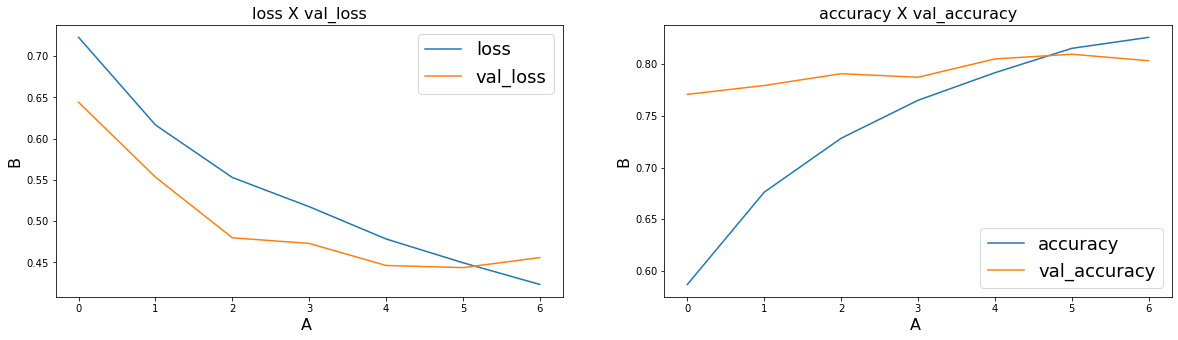

In [56]:
plot(history, [['loss', 'val_loss'],['accuracy', 'val_accuracy']])

In [57]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)

55/55 [==============================] - 0s 4ms/step - loss: 0.4558 - accuracy: 0.8034
Loss: 0.45584431290626526
Accuracy: 0.803428590297699


In [451]:
submission = pd.read_csv('sample_submission.csv')

In [ ]:
submission.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [ ]:
pred = model.predict(test_sentences)

In [ ]:
print(pred[:70])

[[0.9546421 ]
 [0.94437623]
 [0.96990186]
 [0.9036691 ]
 [0.99951893]
 [0.97618926]
 [0.04503679]
 [0.0905351 ]
 [0.07364157]
 [0.13551596]
 [0.30050066]
 [0.18835914]
 [0.18338737]
 [0.150866  ]
 [0.09788969]
 [0.7279967 ]
 [0.20746559]
 [0.24526909]
 [0.15179613]
 [0.19313857]
 [0.20660987]
 [0.32167888]
 [0.16572833]
 [0.9760111 ]
 [0.28071725]
 [0.44343877]
 [0.22951096]
 [0.12563953]
 [0.28419775]
 [0.4347754 ]
 [0.3792096 ]
 [0.66020334]
 [0.59401834]
 [0.261224  ]
 [0.9312939 ]
 [0.04317081]
 [0.45903912]
 [0.40590787]
 [0.25713712]
 [0.9837897 ]
 [0.3275361 ]
 [0.67929673]
 [0.7097647 ]
 [0.62684447]
 [0.08994427]
 [0.35199967]
 [0.12823227]
 [0.19971663]
 [0.7064859 ]
 [0.19971663]
 [0.15920657]
 [0.11142901]
 [0.9609199 ]
 [0.19971663]
 [0.14093184]
 [0.1514076 ]
 [0.15512174]
 [0.3819722 ]
 [0.11785841]
 [0.14093184]
 [0.9342326 ]
 [0.23020443]
 [0.95028234]
 [0.99469256]
 [0.99946874]
 [0.94257474]
 [0.70883423]
 [0.9808458 ]
 [0.7983445 ]
 [0.9308703 ]]


In [ ]:
submission.to_csv("submission_l_b.csv", index=False)

In [ ]:
pred1=(pred>0.5)*1

In [ ]:
submission.target=pred1